<a href="https://colab.research.google.com/github/AshwinRamachandran2002/soc/blob/main/Object_Detection/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  IMPLEMENTATION OF MASK RCNN FOR OBJECT DETECTION

1. Setting up Matterports Mask RCNN

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
!mkdir /mydrive/mask_rcnn

mkdir: cannot create directory ‘/mydrive/mask_rcnn’: File exists


In [ ]:
cd /mydrive/mask_rcnn

/content/gdrive/My Drive/mask_rcnn


Matterport's version made compatible for Tensorflow==2.1.0

In [ ]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2.git

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 125.26 MiB | 16.87 MiB/s, done.
Resolving deltas: 100% (594/594), done.
Checking out files: 100% (76/76), done.


In [ ]:
cd /mydrive/mask_rcnn/Mask_RCNN-TF2/

/content/gdrive/My Drive/mask_rcnn/Mask_RCNN-TF2


2.Additional Dependencies

In [ ]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install kaggle

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 204kB 5.4MB/s 
     |████████████████████████████████| 163kB 32.3MB/s 


In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'ma

In [ ]:
import os
os.chdir('/mydrive/mask_rcnn/Mask_RCNN-TF2/samples')

2. Loading the Pretrained model using COCO weights

In [ ]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib
import coco
from mrcnn.config import Config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version


%matplotlib inline 

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

... done downloading pretrained model!


4.Loading Model in Inference Mode

In [ ]:
class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "coco"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Uncomment to train on 8 GPUs (default is 1)
    # GPU_COUNT = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 80  # COCO has 80 classes

class InferenceConfig(CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    #RPN_NMS_THRESHOLD = 0.5
    #DETECTION_MIN_CONFIDENCE = 0.3
    #DETECTION_NMS_THRESHOLD = 0.5
    

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:

model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


In [ ]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
cd /mydrive/mask_rcnn/

/content/gdrive/My Drive/mask_rcnn


In [ ]:
!wget https://www.dropbox.com/s/j9b8ds6721ept0u/street_tutorial.jpeg

--2021-07-14 11:35:35--  https://www.dropbox.com/s/j9b8ds6721ept0u/street_tutorial.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/j9b8ds6721ept0u/street_tutorial.jpeg [following]
--2021-07-14 11:35:36--  https://www.dropbox.com/s/raw/j9b8ds6721ept0u/street_tutorial.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc046bbe6dc4b69dfb875acc367b.dl.dropboxusercontent.com/cd/0/inline/BSS3Od0Epv3xLg7TXTxJMNT-tncg-seimj_QjV9XeCK-BmDj-gbtpoIHIbenL8v30GUnhLvpXqo_bW0vWpHu23mrmhghBUvPV3w35zl_22jVIug_40behzCfUwSw_TfWht8KcO-HsxcvAHRp56LQTgbH/file# [following]
--2021-07-14 11:35:36--  https://uc046bbe6dc4b69dfb875acc367b.dl.dropboxusercontent.com/cd/0/inline/BSS3Od0Epv3xLg7TXTxJMNT-tncg-seimj_QjV9XeCK-BmDj-gbtpoIHIbenL8v30G

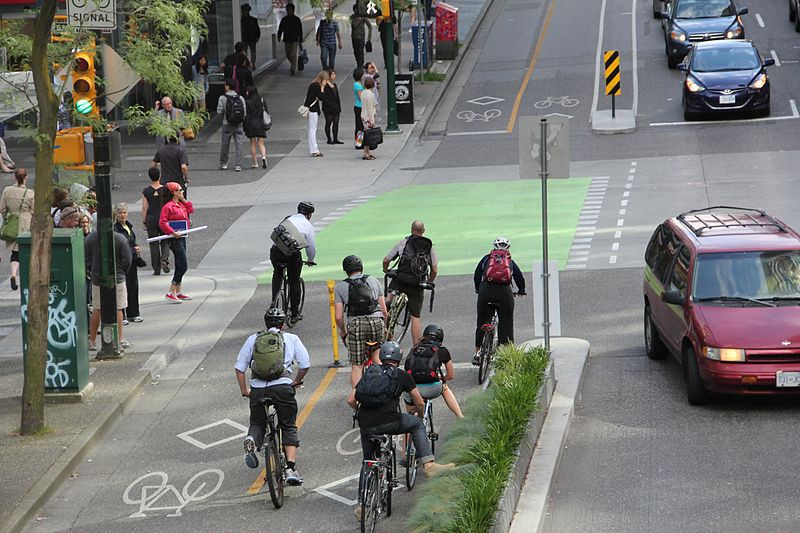

In [ ]:
tutorial_image = cv2.imread('street_tutorial.jpeg')
cv2_imshow(tutorial_image)

In [ ]:
path = '/mydrive/mask_rcnn/street_tutorial.jpeg'
#'/mydrive/mask_rcnn/street_tutorial.jpeg'
#../images/8829708882_48f263491e_z.jpg'
image = skimage.io.imread(path)

results = model.detect([image], verbose=0)
print(results[0]['rois'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[310 233 481 309]
 [239 471 374 525]
 [ 68 301 158 334]
 [180 159 302 197]
 [ 38 678 119 776]
 [222 381 344 437]
 [  3 277  76 305]
 [325 402 450 464]
 [202 113 325 145]
 [163 139 282 171]
 [391 244 509 296]
 [305 473 388 501]
 [132 152 192 191]
 [ 80 215 171 249]
 [202 267 322 320]
 [343 350 488 433]
 [253 334 390 390]
 [ 50  66 122 100]
 [  7 313  74 343]
 [208  84 356 130]
 [165   0 292  33]
 [ 73 322 145 342]
 [ 71 351 152 366]
 [250 483 287 514]
 [326 249 380 286]
 [ 90 223 124 246]
 [237 388 287 431]
 [427 354 528 399]
 [ 73 360 155 382]
 [  4 240  69 262]
 [  0 655  58 748]
 [356 353 410 403]
 [206   1 240  21]
 [  0 344  80 376]
 [185  50 232  89]
 [199 638 406 800]
 [ 97 259 130 273]
 [276 348 315 381]
 [ 79 244 169 270]
 [ 95 155 143 197]
 [218 270 258 303]]


In [ ]:
model_path = os.path.join('/content/drive/MyDrive/mask_rcnn', "mask_rcnn.h5")
model.keras_model.save_weights(model_path)

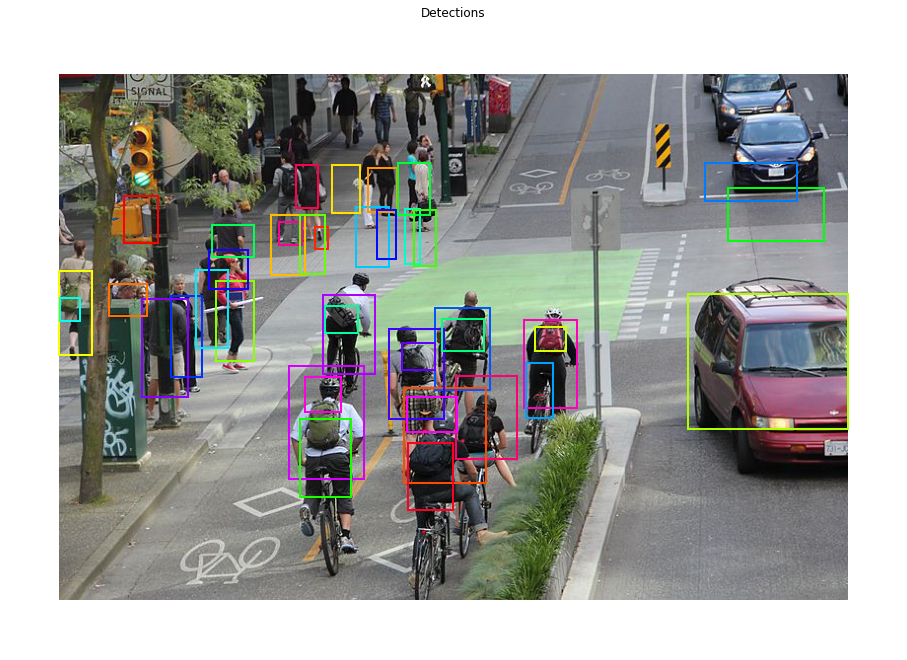

In [ ]:
# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]


visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    title="Detections",
    ax=get_ax())

In [ ]:
class CarlaConfig(Config):
   
    NAME = "carla"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    NUM_CLASSES = 1 + 1  # background + 1 Car

    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    TRAIN_ROIS_PER_IMAGE = 32

    STEPS_PER_EPOCH = 100

    VALIDATION_STEPS = 5
    
config = CarlaConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

7. Training Dataset on M RCNN model 

In [ ]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')

5.Preprocessing Carla Object Detection Dataset for Transfer Learning

In [ ]:
import glob
import xml.etree.ElementTree as ET
import cv2
import numpy as np
xml_files = [open(file) for file in glob.glob("/content/drive/MyDrive/soc/finalTrain/*.xml")]

Y_data= np.zeros((845,12544,1))
def IoU(x1min,x2min,y1min,y2min,x1max,x2max,y1max,y2max):
          inter=0
          inter= (min(x2max,x1max)-max(x1min,x2min))*(min(y2max,y1max)-max(y2min,y1min))
          if inter<=0:
            return 0
          union=(x2max-x2min)*(y2max-y2min)+(x1max-x1min)*(y1max-y1min)-inter
          if union==0:
            return 1
          else:
            return inter/union
print(xml_files)
count=-1
for file in xml_files:
  mytree= ET.parse(file)
  myroot=mytree.getroot()
  count+=1
  print(count)
  u1=[-1,-1]
  u2=[-1,-1]
  u3=[-1,-1]
  for x in myroot.findall('object'):
    
      y=x.find('bndbox')
     
      for i in range(2,224,4):
        for j in range(2, 224,4):
          #print(float(y.find('xmin').text))
          curru1=IoU(float(y.find('xmin').text)/640*224,i-25,float(y.find('ymin').text)/380*224,j-25,float(y.find('xmax').text)/640*224,i+25,float(y.find('ymax').text)/380*224,j+25)
          curru2=IoU(float(y.find('xmin').text)/640*224,i-30,float(y.find('ymin').text)/380*224,j-50,float(y.find('xmax').text)/640*224,i+30,float(y.find('ymax').text)/380*224,j+50)
          curru3=IoU(float(y.find('xmin').text)/640*224,i-50,float(y.find('ymin').text)/380*224,j-30,float(y.find('xmax').text)/640*224,i+50,float(y.find('ymax').text)/380*224,j+30)

          if(curru1>u1[0]):
            u1[0]=curru1
            u1[1]=(i//4)*56+(j//4)

          if(curru2>u2[0]):
            u2[0]=curru2
            u2[1]=(i//4)*56+(j//4)

          if(curru3>u3[0]):
            u3[0]=curru3
            u3[1]=(i//4)*56+(j//4)

      if u1[0] >=0.5:
        Y_data[count,int(u1[1]*4)]=1
        Y_data[count,int(u1[1]*4+1)]=1

      if u2[0] >=0.5:
        Y_data[count,int(u2[1]*4)]=1
        Y_data[count,int(u2[1]*4+2)]=1

      if u3[0] >=0.5:
        Y_data[count,int(u3[1]*4)]=1
        Y_data[count,int(u3[1]*4+3)]=1





        
        

        





In [ ]:
X_data = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/soc/finalTrain/*.png")]


In [ ]:
len(X_data)

In [ ]:
Y_data=Y_data[:821]

In [ ]:
len(Y_data)

6. Comparison with a normal RESNET-50 model using weights trained on ImageNET

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.layers import Flatten, Dense, Dropout
model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in model.layers[:19]:
    layer.trainable = True
x = Flatten()(model.output)
predictions = Dense(12544, activation = 'softmax')(x)
head_model = Model(inputs = model.input, outputs = predictions)
head_model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

head_model.summary()


In [ ]:
count=0
for x in Y_data:
  for y in x:
    if y!=0.0:
      count+=1
print(count)

In [ ]:
Y_data=np.reshape(Y_data,((821,12544)))
X_data = np.asarray(X_data)
print((X_data.shape))
X_data_new=np.zeros((821,224,224,3))
for i in range(821):

  image= cv2.resize(X_data[i],(224,224))
  X_data_new[i]=image

#rint((X_data.shape))
#X_data=np.resize(X_data,((821,224,224,3)))
print((X_data_new.shape))

In [ ]:
history = head_model.fit(X_data_new, Y_data,validation_split=0.13,epochs=40,
                        batch_size=32)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
head_model.save('modelFinal2.h5')

In [ ]:
import tensorflow as tf 
model=tf.keras.models.load_model('/content/drive/MyDrive/soc/modelFinal1.h5')

In [ ]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('/content/drive/MyDrive/soc/finalTrain/Town02_008760.png')
plt.imshow(image)

In [ ]:
image_pred=cv2.resize(image,(224,224))
import numpy as np
image_pred=np.reshape(image_pred,(1,224,224,3))

In [ ]:
pred = model.predict(image_pred)

In [ ]:
print(pred.shape)

In [ ]:
pred_new=np.reshape(pred,(12544))
pred_new=np.asarray(pred_new)
list(pred_new)

In [ ]:
index=0
listpred=list(pred_new)
image_test=np.reshape(image_pred,(224,224,3))
for i in range(0,56*56):
  obj,normal,vert,horiz=listpred[i*4],listpred[i*4+1],listpred[i*4+2],listpred[i*4+3]

  
  if obj<=0.0000001:
    index+=1
    continue
  if normal>=0.000001:
    print('a')
    cv2.rectangle(image_test, (2+ 4*(index//56)-25,2 + 4*(index%56) -25 ), (2+ 4*(index//56)+25,2 + 4*(index%56) +25 ), (0, 0, 255), 2)
  if vert>=0.0000001:
    print('a')
    cv2.rectangle(image_test, (2+ 4*(index//56)-30,2 + 4*(index%56) -50 ), (2+ 4*(index//56)+30,2 + 4*(index%56) +50 ), (0, 0, 255), 2)
    
  if horiz>=0.0000001:
    print('a')
    cv2.rectangle(image_test, (2+ 4*(index//56)-50,2 + 4*(index%56) -30 ), (2+ 4*(index//56)+50,2 + 4*(index%56) +30 ), (0, 0, 255), 2)
  index+=1


plt.imshow(image_test)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The image first goes through ResNET50 and another FC layer to display the anchor boxes.

The input size is 224 x 224, 3 x 3 is the prescribed feature map size, but for convenience i have used a 4 x 4 size thus giving a FC size of 56 x 56 x 9 x (4+2) = 169344

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
test_img=np.reshape(X_data_new[0],(224,224,3))
plt.imshow(test_img/255)

NameError: ignored

In [ ]:
for i in range(12544):
  if test_y[i]==1:
    print(i)

0
1
420
423
1560
1562
4956
4957
6684
6685


7. Testing RESNET model with bounding box regression on Carla DATASet. 
( Imagenet weights provide less accuracy than those trained on COCO dataset).

0
c 105
a 390
1239
c 1384
a 1550
1671


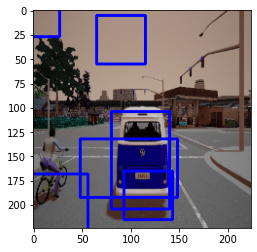

In [ ]:
test_imga=np.reshape(X_data_new[0],(224,224,3))
test_y=np.reshape(Y_data[0],(12544))
listpred=list(test_y)
index=0
for i in range(0,56*56):
  obj,normal,vert,horiz=listpred[i*4],listpred[i*4+1],listpred[i*4+2],listpred[i*4+3]

  
  if obj!=1:
    index+=1
    continue
  if normal==1:
    print(i)
    cv2.rectangle(test_imga, (2+ 4*(index//56)-25,2 + 4*(index%56) -25 ), (2+ 4*(index//56)+25,2 + 4*(index%56) +25 ), (0, 0, 255), 2)
  if vert==1:
    print('a',i)
    cv2.rectangle(test_imga, (2+ 4*(index//56)-30,2 + 4*(index%56) -50 ), (2+ 4*(index//56)+30,2 + 4*(index%56) +50 ), (0, 0, 255), 2)
  if horiz==1:
    print('c',index)
    cv2.rectangle(test_imga, (2+ 4*(index//56)-50,2 + 4*(index%56) -30 ), (2+ 4*(index//56)+50,2 + 4*(index%56) +30 ), (0, 0, 255), 2)
  index+=1


plt.imshow(test_imga/255)